In [76]:
import numpy as np
from scipy.ndimage import map_coordinates
from scipy.interpolate import RegularGridInterpolator
import time
from tqdm import tqdm

In [102]:
import matplotlib.pyplot as plt

In [77]:
img_shape = (100, 100, 100)

data = np.random.rand(*img_shape)
data.shape

(100, 100, 100)

In [78]:
nb_pts = 10000000

shape = (nb_pts, 3)
idx = np.random.rand(*shape)
coords = tuple(idx[:, i]*(data.shape[i]-1) for i in range(idx.shape[-1]))
coords = np.asarray(coords)
coords2 = coords.T
print(coords.shape, coords2.shape)

(3, 10000000) (10000000, 3)


In [79]:
z = np.arange(img_shape[0])
y = np.arange(img_shape[1])
x = np.arange(img_shape[2])

In [80]:
interp = RegularGridInterpolator((z, y, x), data)

In [90]:
def timer(f, args, **kwargs):
    t0 = time.time()
    result = f(*args, **kwargs)
    t = time.time() - t0
    return t, result

In [52]:
%%time
values1 = interp(coords.T)

CPU times: user 1min 47s, sys: 18.2 s, total: 2min 6s
Wall time: 28.8 s


In [41]:
%%time
values2 = map_coordinates(data, coords, order=1)

CPU times: user 6.88 s, sys: 112 ms, total: 6.99 s
Wall time: 6.99 s


In [42]:
np.allclose(values1, values2)

True

In [92]:
t, v = timer(map_coordinates, (data, coords), order=1)

In [95]:
def get_coords(n, bound):
    idx = np.random.rand(n, 3)
    coords = tuple(idx[:, i]*(bound[i]-1) for i in range(idx.shape[-1]))
    coords = np.asarray(coords)
    return coords

In [110]:
N = np.logspace(1, 7, 10, dtype=np.int)

t_rgi = []
t_mc = []
close = []
for n in tqdm(N):
    coords = get_coords(n, data.shape)
    t1, v1 = timer(interp, (coords.T,))
    t_rgi.append(t1)
    t2, v2 = timer(map_coordinates, (data, coords), order=1)
    t_mc.append(t2)
    close.append(np.allclose(v1, v2))
t1 = np.array(t_rgi)
t2 = np.array(t_mc)
print(close)

100%|██████████| 10/10 [00:13<00:00,  1.39s/it]

[True, True, True, True, True, True, True, True, True, True]


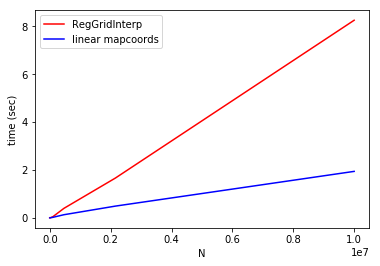

In [116]:
plt.plot(N, t1, 'r-', label='RegGridInterp')
plt.plot(N, t2, 'b-', label='linear mapcoords')
plt.xlabel('N')
plt.ylabel('time (sec)')
plt.legend()
plt.show()

In [123]:
N = np.linspace(1, 10000000, 10, dtype=np.int)

t_rgi = []
t_mc = []
close = []
for n in tqdm(N):
    coords = get_coords(n, data.shape)
    t1, v1 = timer(interp, (coords.T,))
    t_rgi.append(t1)
    t2, v2 = timer(map_coordinates, (data, coords), order=1)
    t_mc.append(t2)
    close.append(np.allclose(v1, v2))
t1 = np.array(t_rgi)
t2 = np.array(t_mc)
print(close)

100%|██████████| 10/10 [00:55<00:00,  5.51s/it]

[True, True, True, True, True, True, True, True, True, True]


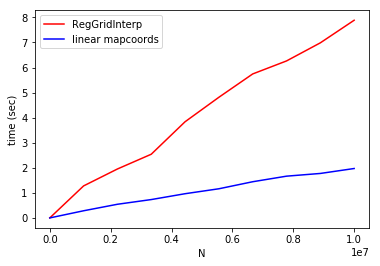

In [124]:
plt.plot(N, t1, 'r-', label='RegGridInterp')
plt.plot(N, t2, 'b-', label='linear mapcoords')
plt.xlabel('N')
plt.ylabel('time (sec)')
plt.legend()
plt.show()